# **Final Project 1 Linear Regresion**
## **1. Perkenalan**

Nama Anggota Kelompok :
1. Carenina Amanda Putri / PYTN-KS12-017
2. Aurisha Lutvinda Putrian / PYTN-KS12-014
3. Muhammad Rafi Ramadhan / PYTN-KS12-002



### 1.1 Latar Belakang

Pada Project ini berisi penerapan Linier Regresi untuk menentukan harga yang dikeluarkan untuk menggunakan rideshare uber ataupun lyft. Data yang digunakan merupakan dataset Uber and Lyft Dataset Boston, MA yang mencatat pemesanan perjalanan taksi Uber dan Lyft di kota Boston selama November dan Desember 2018. Dataset ini terdiri dari 693071 baris dengan total kolom sebanyak 57 tentang data harga perjalanan menggunakan taksi Uber & Lyft berdasarkan waktu, penggandaan harga (surge multiplier), jarak, dan keadaan cuaca pada saat itu. Variabel dependen/responnya adalah price.
LinearRegression digunakan untuk mengetahui bagaimana pengaruh waktu, penggandaan harga, jarak, dan keadaan cuaca terhadap variasi harga dan juga mendapatkan model prediksi harga armada Uber/Lyft berdasarkan faktor-faktor yang diketahui.

### 1.2 Objektif
- Mampu memahami konsep regression dengan Linear Regression
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression 
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi

## **2. Import Library**
Pada bagian ini menggunakan import library untuk melakukan preproceesing, visualisasi dan modelling


In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression as lr
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import xgboost as xg
import statsmodels.api as sm

import datetime
from datetime import date
import calendar


%matplotlib inline
pd.options.mode.chained_assignment = None 
import warnings
warnings.filterwarnings('ignore')

## **3. Data Loading**


## 3.1 Read Dataframe dari source CSV
Memasukkan dataframe, dataframe yang digunakan kali ini adalah dataframe uber vs lyft, yang kemudian menampilkan data teratas

In [109]:
df = pd.read_csv ('C:/Users/unila/Downloads/rideshare_kaggle.csv') 
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


## 3.2 Menampilkan 5 data teratas

In [110]:
print("Dataset berisi {} baris dan {} kolom (atribut)".format(df.shape[0], df.shape[1]))
df.head(5)

Dataset berisi 693071 baris dan 57 kolom (atribut)


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Dataset ini memiliki 57 atribut. Atribut dalam dataset ini antara lain :

1. id : unique identifier for each column
2. timestamp : unix timestamp
3. hour : hour of the day
4. day : day of the week
5. month : month in a year
6. datetime : date value
7. Timezone
8. source : initial source of the ride
9. destination : destination of the ride
10. cab_type : the type of cab
11. . . . dan lainnya

### 3.3 Melihat data terbawah

In [111]:
df.tail(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


### 3.4 Melihat informasi kolom, baris, dan data type

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dari hasil di atas merupakan seluruh variabel yang terdapat dari dataset rideshare yang berjumlah sebanyak 57 variabel, dan memiliki 3 jenis tipe data yang terdiri dari object, float, dan integer

Terdapat 55095 nilai yang kosong pada atribut Price.

### 3.5 Melihat Statistik Dataframe secara umum

In [113]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


Hasil di atas menunjukkan statistik deskriptif dari seluruh variabel dataframe rideshare.

### 3.6 Mengecek statistik deskriptif dari masing-masing atribut yang bertipe object

In [114]:
df.describe(include='O')

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
count,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071
unique,693071,31350,1,12,12,2,13,13,9,11,7
top,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-11-26 23:21:14,America/New_York,Financial District,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Mostly cloudy throughout the day.,cloudy
freq,1,156,693071,58857,58851,385663,55096,55096,218895,202340,218895


### 3.7 Melihat banyaknya unique values untuk tiap atribut.

In [115]:
for col in df.columns:
    print(col,': ', df[col].nunique())

id :  693071
timestamp :  36179
hour :  24
day :  17
month :  2
datetime :  31350
timezone :  1
source :  12
destination :  12
cab_type :  2
product_id :  13
name :  13
price :  147
distance :  549
surge_multiplier :  7
latitude :  11
longitude :  12
temperature :  308
apparentTemperature :  319
short_summary :  9
long_summary :  11
precipIntensity :  63
precipProbability :  29
humidity :  51
windSpeed :  291
windGust :  286
windGustTime :  25
visibility :  227
temperatureHigh :  129
temperatureHighTime :  23
temperatureLow :  133
temperatureLowTime :  31
apparentTemperatureHigh :  124
apparentTemperatureHighTime :  27
apparentTemperatureLow :  136
apparentTemperatureLowTime :  32
icon :  7
dewPoint :  313
pressure :  316
windBearing :  195
cloudCover :  83
uvIndex :  3
visibility.1 :  227
ozone :  274
sunriseTime :  110
sunsetTime :  114
moonPhase :  18
precipIntensityMax :  65
uvIndexTime :  20
temperatureMin :  131
temperatureMinTime :  25
temperatureMax :  128
temperatureMaxTime : 

### 3.8 Melihat Ukuran Dataframe

In [116]:
df.shape

(693071, 57)

dataframe yang digunakan memiliki total observasi sebanyak 693071 baris dan total variabel 57 kolom

### 3.9 Melihat unique value untuk atribut [cab_type]()

In [117]:
df['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

## **4. Data Cleaning**

In [118]:
df.duplicated().sum()

0

In [119]:
df['price'].isnull().sum()

55095

Dapat dilihat bahwa terdapat missing value sebanyak 55095 data.

In [120]:
print(df['price'].isnull().sum()/df.shape[0] * 100, '%')

7.949402009317949 %


Presentase missing value pada data ini adalah sebesar 7.95%

In [121]:
df2 = df.drop(df[df['price'].isnull()].index)

In [122]:
df.shape, df2.shape

((693071, 57), (637976, 57))

In [123]:
df2.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [124]:
df['price'].isnull().sum()

55095

In [125]:
df = df.dropna()

In [126]:
df['price'].isnull().sum()

0

Dapat dilihat bahwa setelah di drop, data sudah tidak terdapat missing value.

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           637976 non-null  object 
 1   timestamp                    637976 non-null  float64
 2   hour                         637976 non-null  int64  
 3   day                          637976 non-null  int64  
 4   month                        637976 non-null  int64  
 5   datetime                     637976 non-null  object 
 6   timezone                     637976 non-null  object 
 7   source                       637976 non-null  object 
 8   destination                  637976 non-null  object 
 9   cab_type                     637976 non-null  object 
 10  product_id                   637976 non-null  object 
 11  name                         637976 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [128]:
pd.crosstab(df.product_id, df.name)

name,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
product_id,,,,,,,,,,,,
55c66225-fbe7-4fd5-9072-eab1ece5e23e,0,0,0,0,0,0,0,0,0,55094,0,0
6c84fd89-3f11-4782-9b50-97c468b19529,55095,0,0,0,0,0,0,0,0,0,0,0
6d318bcc-22a3-4af6-bddd-b409bfce1546,0,55096,0,0,0,0,0,0,0,0,0,0
6f72dfc5-27f1-42e8-84db-ccc7a75f6969,0,0,0,0,0,0,0,0,0,0,55096,0
997acbb5-e102-41e1-b155-9df7de0a73f2,0,0,0,0,0,0,0,0,55091,0,0,0
9a0e7b09-b92b-4c41-9779-2ad22b4d779d,0,0,0,0,0,0,0,0,0,0,0,55096
lyft,0,0,0,0,0,51235,0,0,0,0,0,0
lyft_line,0,0,0,0,0,0,0,51233,0,0,0,0
lyft_lux,0,0,0,51235,0,0,0,0,0,0,0,0


In [129]:
remove1_cols = ["id", "timestamp", "timezone", "product_id", "latitude", "longitude"]

remove2_cols = ["precipIntensity", "precipProbability", "windGustTime", "temperatureHigh", "temperatureHighTime", "temperatureLow", 
                "temperatureLowTime", "apparentTemperatureHigh", "apparentTemperatureHighTime", "apparentTemperatureLow", 
                "apparentTemperatureLowTime", "icon", "dewPoint", "windBearing", "uvIndex", "visibility.1", "ozone", "sunriseTime", 
                "sunsetTime", "uvIndexTime", "temperatureMin", "temperatureMinTime", "temperatureMax", "temperatureMaxTime", 
                "apparentTemperatureMin", "apparentTemperatureMinTime", "apparentTemperatureMax", "apparentTemperatureMaxTime", 
                "apparentTemperature"]

In [130]:
df3 = df2.drop(remove1_cols, axis=1)

df3 = df3.drop(remove2_cols, axis=1)

In [131]:
df3.head()

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,...,short_summary,long_summary,humidity,windSpeed,windGust,visibility,pressure,cloudCover,moonPhase,precipIntensityMax
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,...,Mostly Cloudy,Rain throughout the day.,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,...,Rain,"Rain until morning, starting again in the eve...",0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,...,Clear,Light rain in the morning.,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,Clear,Partly cloudy throughout the day.,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,Partly Cloudy,Mostly cloudy throughout the day.,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001


In [132]:
df3 = df3.rename(columns={'hour':'Jam', 'day':'Hari','month':'Bulan', 'source':'Asal', 'destination': 'Tujuan','cab_type':'Merek',
                        'name':'Produk','price':'Tarif','distance':'Jarak', 'temperature':'Suhu','humidity':'Kelembapan','short_summary':'Cuaca',
                        'pressure':'Tekanan', 'datetime':'Tanggal','long_summary':'Keterangan', 'surge_multiplier':'Surge_multiplier','windSpeed':'Kecepatan_angin', 'windGust':'Hembusan_angin','cloudCover':'Tutupan_awan', 
                        'visibility':'Visibilitas', 'moonPhase':'Fase_bulan','precipIntensityMax':'Intensitas_maks'})

In [133]:
df3.head()

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Merek,Produk,Tarif,Jarak,...,Cuaca,Keterangan,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,...,Mostly Cloudy,Rain throughout the day.,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,...,Rain,"Rain until morning, starting again in the eve...",0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,...,Clear,Light rain in the morning.,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,Clear,Partly cloudy throughout the day.,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,Partly Cloudy,Mostly cloudy throughout the day.,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001


In [134]:
df3.loc[df3['Produk'] == 'Taxi', 'Produk'] = 'Uber Taxi'
df3.loc[df3['Produk'] == 'Shared', 'Produk'] = 'Lyft Shared'
df3.loc[df3['Produk'] == 'Lux', 'Produk'] = 'Lyft Lux'
df3.loc[df3['Produk'] == 'Lyft', 'Produk'] = 'Lyft Regular'
df3.loc[df3['Produk'] == 'Black SUV', 'Produk'] = 'Uber Black SUV'
df3.loc[df3['Produk'] == 'WAV', 'Produk'] = 'Uber WAV'
df3.loc[df3['Produk'] == 'Black', 'Produk'] = 'Uber Black'

In [135]:
df3.head()

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Merek,Produk,Tarif,Jarak,...,Cuaca,Keterangan,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Lyft Shared,5.0,0.44,...,Mostly Cloudy,Rain throughout the day.,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lyft Lux,11.0,0.44,...,Rain,"Rain until morning, starting again in the eve...",0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft Regular,7.0,0.44,...,Clear,Light rain in the morning.,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,Clear,Partly cloudy throughout the day.,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,Partly Cloudy,Mostly cloudy throughout the day.,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001


In [136]:
for col in df3.columns:
    print(col,': ')
    print(df3[col].value_counts())
    print("  ")
    print("  ")

Jam : 
0     29872
23    29355
17    28075
12    28017
13    27977
14    27976
16    27972
18    27958
11    27946
10    27918
15    27868
22    27093
9     26673
2     26323
1     26310
4     26125
21    25549
3     25530
19    25410
6     25147
20    24620
5     22995
7     22930
8     22337
Name: Jam, dtype: int64
  
  
Hari : 
27    70135
28    67842
29    55222
1     41680
30    41544
16    41359
17    41354
14    41344
15    41332
3     41323
2     41298
13    35496
18    33329
26    29028
4     11627
10     2534
9      1529
Name: Hari, dtype: int64
  
  
Bulan : 
12    374205
11    263771
Name: Bulan, dtype: int64
  
  
Tanggal : 
2018-11-26 23:33:14    151
2018-11-29 02:29:08    149
2018-11-29 02:47:08    146
2018-11-27 00:03:14    146
2018-11-29 04:38:08    146
                      ... 
2018-12-03 07:33:03      3
2018-11-30 21:33:07      3
2018-12-15 06:05:07      3
2018-12-13 15:10:13      1
2018-11-30 13:17:58      1
Name: Tanggal, Length: 31350, dtype: int64
  
  
Asal : 


In [137]:
df4 = df3.copy()

df4["Tarif_per_mile"] = df4["Tarif"] / df4["Jarak"]

In [138]:
df4.head()

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Merek,Produk,Tarif,Jarak,...,Keterangan,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks,Tarif_per_mile
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Lyft Shared,5.0,0.44,...,Rain throughout the day.,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276,11.363636
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lyft Lux,11.0,0.44,...,"Rain until morning, starting again in the eve...",0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300,25.000000
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft Regular,7.0,0.44,...,Light rain in the morning.,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064,15.909091
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,Partly cloudy throughout the day.,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000,59.090909
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,Mostly cloudy throughout the day.,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001,20.454545


In [139]:
df4['Tanggal'] = df4['Tanggal'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
df4['Hari_dlm_pekan'] = df4['Tanggal'].apply(lambda x: calendar.day_name[x.weekday()])

In [140]:
df4.head(7)

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Merek,Produk,Tarif,Jarak,...,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks,Tarif_per_mile,Hari_dlm_pekan
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Lyft Shared,5.0,0.44,...,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276,11.363636,Sunday
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lyft Lux,11.0,0.44,...,0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300,25.000000,Tuesday
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft Regular,7.0,0.44,...,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064,15.909091,Wednesday
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,...,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000,59.090909,Friday
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,...,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001,20.454545,Thursday
5,18,17,12,2018-12-17 18:25:12,Haymarket Square,North Station,Lyft,Lux Black,16.5,0.44,...,0.84,7.19,8.88,8.325,1000.46,1.00,0.33,0.0221,37.500000,Monday
6,5,26,11,2018-11-26 05:03:00,Back Bay,Northeastern University,Lyft,Lyft XL,10.5,1.08,...,0.91,0.53,0.88,4.675,1014.11,1.00,0.64,0.1245,9.722222,Monday


In [141]:
df4 = df4.drop(["Tanggal"], axis=1)

In [142]:
df4.head()

,Jam,Hari,Bulan,Asal,Tujuan,Merek,Produk,Tarif,Jarak,Surge_multiplier,...,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks,Tarif_per_mile,Hari_dlm_pekan
0,9,16,12,Haymarket Square,North Station,Lyft,Lyft Shared,5.0,0.44,1.0,...,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276,11.363636,Sunday
1,2,27,11,Haymarket Square,North Station,Lyft,Lyft Lux,11.0,0.44,1.0,...,0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300,25.000000,Tuesday
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft Regular,7.0,0.44,1.0,...,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064,15.909091,Wednesday
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,...,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000,59.090909,Friday
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,...,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001,20.454545,Thursday


In [143]:
df4["Rute"] = df4["Asal"] + "-" + df4['Tujuan']
df4["Rute"]

0         Haymarket Square-North Station
1         Haymarket Square-North Station
2         Haymarket Square-North Station
3         Haymarket Square-North Station
4         Haymarket Square-North Station
                       ...              
693065                West End-North End
693066                West End-North End
693067                West End-North End
693069                West End-North End
693070                West End-North End
Name: Rute, Length: 637976, dtype: object

## **5. Exploratory Data Analysis**



In [144]:
df4.describe()

,Jam,Hari,Bulan,Tarif,Jarak,Surge_multiplier,Suhu,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks,Tarif_per_mile
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,11.618528,17.797674,11.586550,16.545125,2.189261,1.015068,39.582406,0.741056,6.186795,8.470616,8.469180,1010.092744,0.686291,0.579076,0.037369,9.687674
std,6.948776,9.982083,0.492452,9.324359,1.135413,0.095422,6.725500,0.138575,3.147856,5.288683,2.601828,13.475580,0.358599,0.244674,0.055216,13.705589
min,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,18.910000,0.380000,0.450000,0.800000,0.717000,988.090000,0.000000,0.090000,0.000000,0.556586
25%,6.000000,13.000000,11.000000,9.000000,1.270000,1.000000,36.450000,0.640000,3.410000,4.060000,8.432000,999.820000,0.370000,0.300000,0.000000,4.661017
50%,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,40.490000,0.710000,5.910000,7.550000,9.880000,1009.250000,0.820000,0.680000,0.000400,7.492326
75%,18.000000,28.000000,12.000000,22.500000,2.930000,1.000000,43.580000,0.880000,8.410000,11.740000,9.996000,1021.860000,1.000000,0.790000,0.091600,11.538462
max,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,57.220000,0.960000,15.000000,27.250000,10.000000,1035.550000,1.000000,0.930000,0.145900,1375.000000


In [145]:
df4.Jam.value_counts()

0     29872
23    29355
17    28075
12    28017
13    27977
14    27976
16    27972
18    27958
11    27946
10    27918
15    27868
22    27093
9     26673
2     26323
1     26310
4     26125
21    25549
3     25530
19    25410
6     25147
20    24620
5     22995
7     22930
8     22337
Name: Jam, dtype: int64

In [146]:
df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'
                 ,'latitude','longitude'],axis = 1)
print(df.shape)
df.head(5)

(637976, 40)


,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,...,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,...,0.72,0,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,...,1.00,0,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,...,0.03,0,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,...,0.00,0,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,...,0.44,0,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


In [147]:
df_new = df[['price','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']]
df_new.head()

,price,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07
1,11.0,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92
2,7.0,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12
3,26.0,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53
4,9.0,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75


<Axes: >

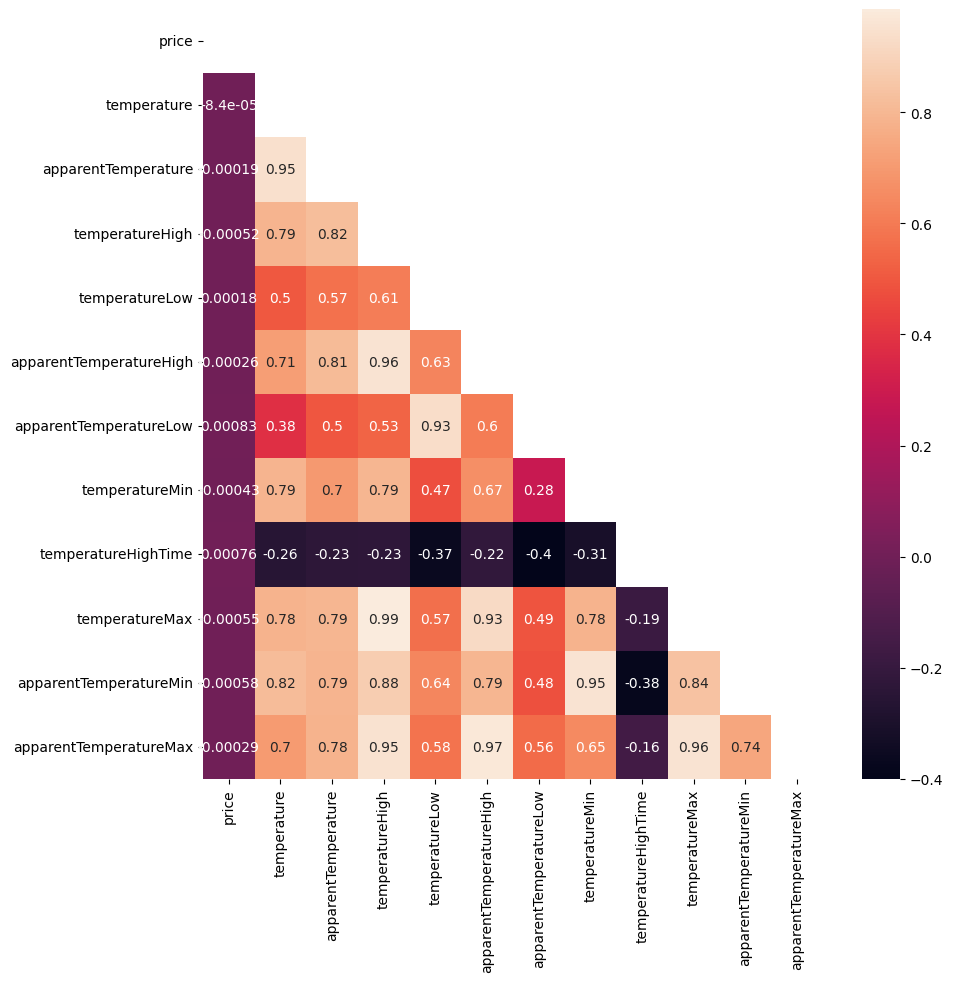

In [148]:
#plotting heatmap dengan correlation pada df_new dataframe
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(),annot=True, mask=np.triu(df_new.corr()))

Dapat dilihat semua feature temperatur memiliki korelasi yang sangat lemah terhadap target price, maka tahap selanjutnya adalah menghapus semua feature tersebut karena nilai-nilainya hampir 0.

In [149]:
iklm_col = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax']

df = df.drop(iklm_col, axis=1)
df.head()

,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,...,temperatureHigh,temperatureHighTime,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,...,43.68,1544968800,34.19,37.95,27.39,partly-cloudy-night,39.89,43.68,33.73,38.07
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,...,47.30,1543251600,42.10,43.92,36.20,rain,40.49,47.30,36.20,43.92
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,...,47.55,1543320000,33.10,44.12,29.11,clear-night,35.36,47.55,31.04,44.12
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,...,45.03,1543510800,28.90,38.53,26.20,clear-night,34.67,45.03,30.30,38.53
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,...,42.18,1543420800,36.71,35.75,30.29,partly-cloudy-night,33.10,42.18,29.11,35.75


In [150]:
df.shape

(637976, 25)

### Mencari harga termurah dan termahal pada Uber dan Lyft selama menerima penumpang.

In [151]:
# Harga Uber
df4.loc[df4['Merek'] == 'Uber', 'Tarif'].agg(('min', 'max'))

min     4.5
max    89.5
Name: Tarif, dtype: float64

In [152]:
# Harga Lyft
df4.loc[df4['Merek'] == 'Lyft', 'Tarif'].agg(('min', 'max'))

min     2.5
max    97.5
Name: Tarif, dtype: float64

Berdasarkan hasil ditemukan bahwa Uber menawarkan tarif terendah sebesar 4.5 dollar dan tarif tertinggi sebesar 89.5 dollar ketika mengangkut penumpang. Sementara itu, Lyft menawarkan tarif terendah sebesar 2.5 dollar dan tarif tertinggi sebesar 97.5 dollar ketika mengangkut penumpang.

### Melihat rata-rata harga untuk masing-masing merek dengan melakukan grouping

In [153]:
mean_product = df4[['Merek', 'Produk', 'Tarif']].groupby(['Merek', 'Produk']).mean().sort_values(by='Tarif', ascending=False)
mean_product

Tarif
Merek Produk                   
Lyft  Lux Black XL    32.324086
Uber  Uber Black SUV  30.286763
Lyft  Lux Black       23.062468
Uber  Uber Black      20.523786
Lyft  Lyft Lux        17.771240
Uber  UberXL          15.678144
Lyft  Lyft XL         15.309363
Uber  UberX            9.765074
      Uber WAV         9.765019
Lyft  Lyft Regular     9.610885
Uber  UberPool         8.752500
Lyft  Lyft Shared      6.029893

Dari data diatas diketahui bahwa produk yang memiliki harga tertinggi adalah Lux Black XL yang merupakan produk dari Lyft, sedangkan untuk produk dengan harga terendah adalah Lyft Shared

### Membuat visualisasi data dengan boxplot untuk perbandingan jenis taksi berdasarkan jarak

Text(0.5, 1.0, 'Merek vs Jarak')

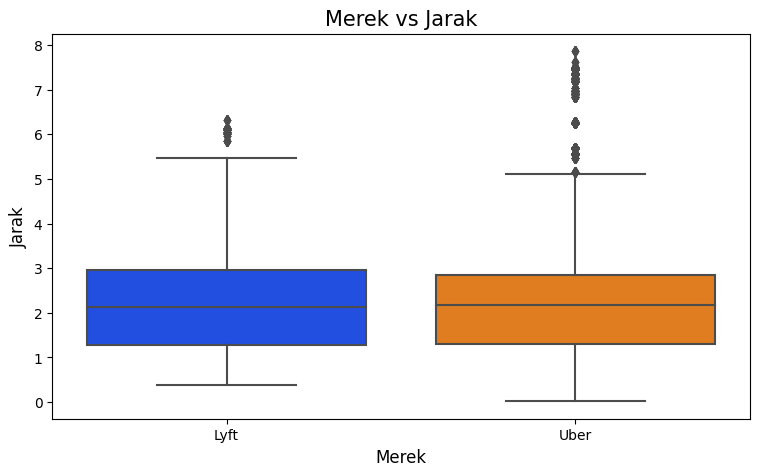

In [154]:
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='Merek', y='Jarak', data=df4, palette='bright')

plt.xlabel("Merek", fontsize= 12)
plt.ylabel("Jarak", fontsize= 12)
plt.title("Merek vs Jarak", fontsize= 15)

Dari data diatas diketahui bahwa Uber memiliki whisker yang menandakan uber memiliki variabilitas jarak yang lebih tinggi. Kemudian Merek Uber juga memiliki Outliers yang lebih banyak daripada Lyft yang mungkin menunjukkan data ekstrim atau anomali dalam jarak untuk masing-masing merek.

### Historgram Untuk Melihat Proporsi Data Antara Uber Vs Lyft

Uber    330568
Lyft    307408
Name: Merek, dtype: int64


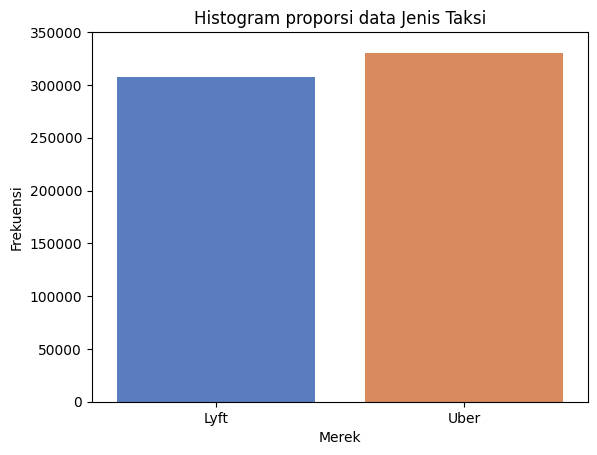

In [155]:
merek_counts = df4['Merek'].value_counts()
print(merek_counts)

sns.countplot(x="Merek", data=df4, palette="muted")
plt.title('Histogram proporsi data Jenis Taksi') 
plt.ylim(top=350000)
plt.ylabel('Frekuensi') 
plt.xlabel('Merek')#add x-label
plt.show()

Berdasarkan histogram di atas, dapat disimpulkan bahwa Lyft memiliki frekuensi data yang lebih rendah daripada Uber, yakni sejumlah 307.408 data, sementara Uber memiliki frekuensi data sebanyak 330.568. Dapat ditarik kesimpulan juga bahwa Uber memiliki jumlah orderan yang lebih banyak ketimbang Lyft.

## **6. Data Preprocessing**

### 6.1 Encoder using OneHotEncoder

In [156]:
df.head()

,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,...,temperatureHigh,temperatureHighTime,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,...,43.68,1544968800,34.19,37.95,27.39,partly-cloudy-night,39.89,43.68,33.73,38.07
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,...,47.30,1543251600,42.10,43.92,36.20,rain,40.49,47.30,36.20,43.92
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,...,47.55,1543320000,33.10,44.12,29.11,clear-night,35.36,47.55,31.04,44.12
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,...,45.03,1543510800,28.90,38.53,26.20,clear-night,34.67,45.03,30.30,38.53
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,...,42.18,1543420800,36.71,35.75,30.29,partly-cloudy-night,33.10,42.18,29.11,35.75


In [157]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax= plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

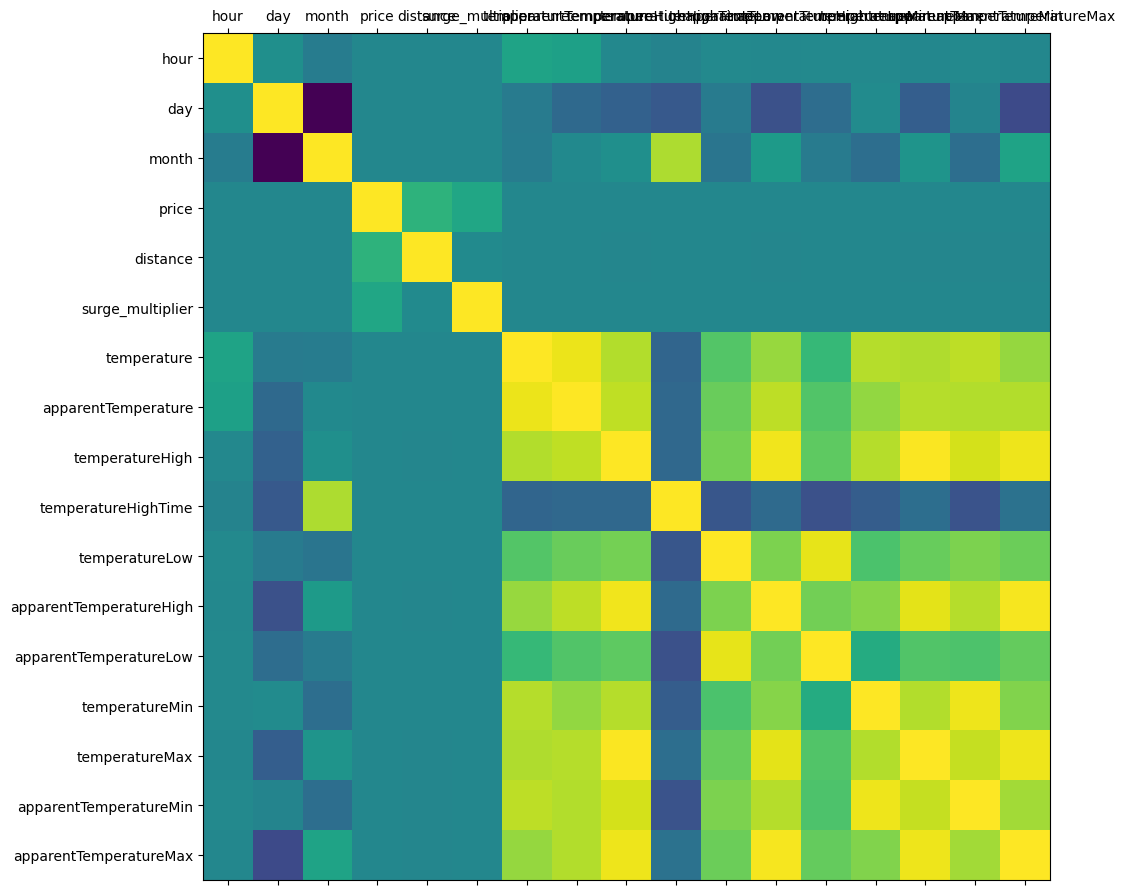

In [158]:
plot_corr(df)

Dapat dilihat visualisasi tersebut merupakan plot matriks korelasi untuk semua kolom numerik pada dataframe df. Feature Temperature memiliki korelasi yang rendah dengan feature target price. Sehingga menghapus Feature temperature tidak akan mempengaruhi model

In [159]:
df.corr()

,hour,day,month,price,distance,surge_multiplier,temperature,apparentTemperature,temperatureHigh,temperatureHighTime,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
hour,1.000000,0.066223,-0.079734,0.000561,0.002283,-0.000067,0.218829,0.198212,0.005191,-0.028323,0.015000,0.005518,0.015722,0.015668,0.002982,0.015882,0.002904
day,0.066223,1.000000,-0.861325,-0.000722,-0.000992,0.001397,-0.083934,-0.223410,-0.283410,-0.343251,-0.088370,-0.398099,-0.192984,0.038089,-0.304704,-0.019878,-0.444366
month,-0.079734,-0.861325,1.000000,0.000913,0.002402,-0.000612,-0.082048,0.024773,0.068094,0.772119,-0.138703,0.152479,-0.087019,-0.191928,0.105113,-0.191293,0.214928
price,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,-0.000084,-0.000193,-0.000516,0.000759,0.000182,-0.000261,0.000831,-0.000428,-0.000550,-0.000580,-0.000290
distance,0.002283,-0.000992,0.002402,0.345061,1.000000,0.025946,-0.002738,-0.002835,-0.003795,0.003338,-0.001744,-0.003699,-0.001006,-0.003192,-0.003875,-0.003649,-0.003889
surge_multiplier,-0.000067,0.001397,-0.000612,0.240458,0.025946,1.000000,-0.001594,-0.002586,-0.001943,0.000560,-0.002669,-0.002098,-0.003088,-0.000716,-0.001998,-0.001317,-0.002214
temperature,0.218829,-0.083934,-0.082048,-0.000084,-0.002738,-0.001594,1.000000,0.946157,0.788564,-0.257457,0.502193,0.710386,0.382828,0.789220,0.780426,0.817443,0.703078
apparentTemperature,0.198212,-0.223410,0.024773,-0.000193,-0.002835,-0.002586,0.946157,1.000000,0.821492,-0.233333,0.573985,0.811624,0.495844,0.697343,0.792476,0.786478,0.782255
temperatureHigh,0.005191,-0.283410,0.068094,-0.000516,-0.003795,-0.001943,0.788564,0.821492,1.000000,-0.231465,0.611616,0.958722,0.534808,0.794579,0.985996,0.877508,0.951037
temperatureHighTime,-0.028323,-0.343251,0.772119,0.000759,0.003338,0.000560,-0.257457,-0.233333,-0.231465,1.000000,-0.366003,-0.218425,-0.400401,-0.309989,-0.188985,-0.381595,-0.159892


In [160]:
#Melakukan encoding dengan One Hot Encoder pada atribut yang memiliki tipe data Object.
def one_hot_encoder(df,feature,keep_first=True):
    one_hot_cols = pd.get_dummies(df[feature])
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_df = pd.concat([df,one_hot_cols],axis=1)
    new_df.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_df=new_df.iloc[:,1:]
    
    return new_df

df_copy = df.copy()
for col in df_copy.select_dtypes(include='O').columns:
    df_copy=one_hot_encoder(df_copy,col)

df_copy.head()

,hour,day,month,price,distance,surge_multiplier,temperature,apparentTemperature,temperatureHigh,temperatureHighTime,...,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,9,16,12,5.0,0.44,1.0,42.34,37.12,43.68,1544968800,...,0,0,0,0,0,0,0,0,1,0
1,2,27,11,11.0,0.44,1.0,43.58,37.35,47.30,1543251600,...,0,0,1,0,0,0,0,0,0,1
2,1,28,11,7.0,0.44,1.0,38.33,32.93,47.55,1543320000,...,0,0,0,0,1,0,0,0,0,0
3,4,30,11,26.0,0.44,1.0,34.38,29.63,45.03,1543510800,...,0,0,0,0,1,0,0,0,0,0
4,3,29,11,9.0,0.44,1.0,37.44,30.88,42.18,1543420800,...,1,0,0,0,0,0,0,0,1,0


In [161]:
# Binary encode kolom cab_type
df['cab_type'] = df['cab_type'].replace({'Lyft': 0, 'Uber': 1})

In [162]:
#Encoding semua kolom bertipe cateogory dengan onehot encoder
categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print(categorical_cols)

['timezone', 'source', 'destination', 'product_id', 'name', 'short_summary', 'icon']


In [163]:
for col in categorical_cols:
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoder_df = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray())
        encoder_df.columns = encoder.get_feature_names_out([col])
        df = df.drop(col, axis=1)
        df = pd.concat([df, encoder_df], axis=1)

In [164]:
# Split the data into input and target
X = df_copy.drop(columns=['price'])
y = np.log(df_copy['price'])

print(X.shape)
print(y.shape)

(637976, 83)
(637976,)


Diatas kami mendefinisikan untuk variabel X nya yaitu kolom selain Harga, sedangkan untuk variabel y yaitu Harga.

In [165]:
# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=200)

In [166]:
df.columns

Index(['hour', 'day', 'month', 'cab_type', 'price', 'distance',
       'surge_multiplier', 'temperature', 'apparentTemperature',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'apparentTemperatureHigh', 'apparentTemperatureLow', 'temperatureMin',
       'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax',
       'timezone_America/New_York', 'source_Back Bay', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'source_nan',
       'destination_Back Bay', 'destination_Beacon Hill',
       'destination_Boston University', 'destination_Fenway',
       'destination_Financial District', 'destination_Haymarket Square',
       'destination_North End', 'destination_North Station',
       'destination_

In [167]:
# analisis dan cek korelasi antara price dengan kolom yang berhubungan dengan source
source_cols = ['price','source_Back Bay', 'source_Beacon Hill', 'source_Boston University','source_Fenway',
               'source_Financial District', 'source_Haymarket Square','source_North End', 'source_North Station',
               'source_Northeastern University', 'source_South Station','source_Theatre District',
               'source_West End']
new_data = df[source_cols]
new_data.head()

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

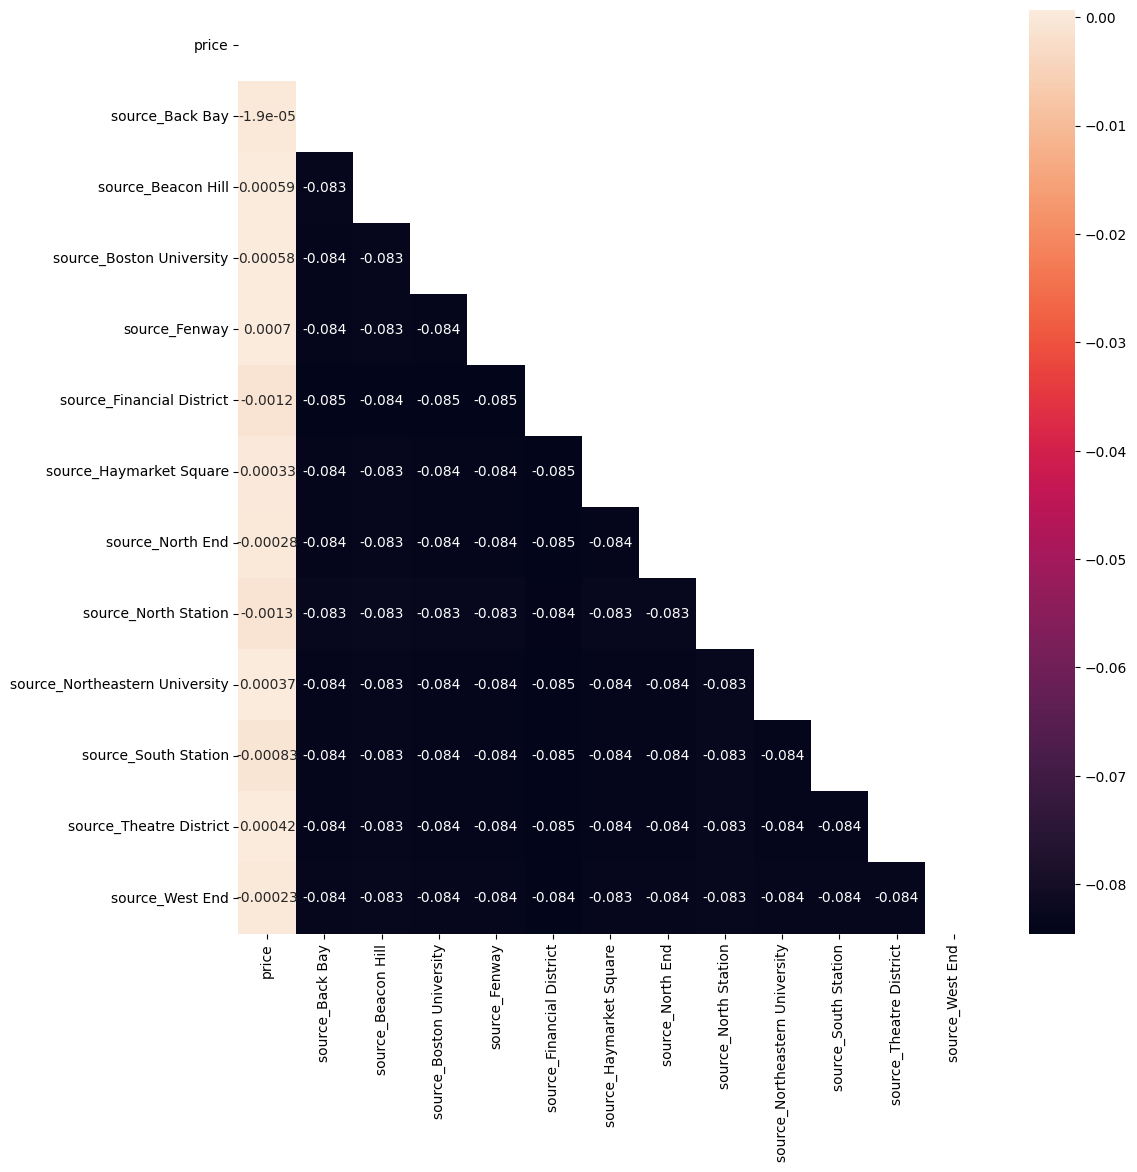

In [168]:
plt.figure(figsize=(12,12))
sns.heatmap(new_data.corr(), annot=True, mask=np.triu(new_data.corr()))

## **7. Pendefinisian Model**

## 7.1 Memisahkan dataframe menjadi x dan y

In [169]:
x = new_data.drop('price', axis =1)
y = new_data['price']

## **8. Latih Model**

### 8.1 Linear Regression

In [170]:
# Create Linear regression Model
model_LR = lr()

# Train the Model
model_LR.fit(X_train, y_train)
    
print('Intercept:', model_LR.intercept_)
print('Coefficients: ', model_LR.coef_)
print('Coefficient of Determination: ', model_LR.score(X_test, y_test))

Intercept: -4.486732668588152
Coefficients:  [ 1.38167850e-05 -3.48095573e-04 -9.57935030e-03  1.75104062e-01
  7.01044839e-01  4.06094737e-05  6.43134062e-05  1.47474229e-02
  3.98702275e-09 -1.92204405e-04 -8.50054645e-03  1.59909306e-04
  2.16158069e-05 -1.44912650e-02 -7.10525972e-05  8.27993236e-03
  2.28289609e-15  2.22064905e-03 -3.38801665e-03 -2.35123746e-02
 -4.28849780e-03 -3.14513291e-02  1.55820841e-03  3.23823341e-02
 -5.83013817e-03 -1.33665788e-02  1.37935328e-02  3.03900955e-02
  1.49211523e-03  6.78484621e-03  3.70111047e-04 -3.85597448e-03
 -1.53072292e-02 -2.14315315e-02  5.75859814e-03  3.11619407e-03
 -2.48007712e-03  7.27490280e-03 -3.55311557e-03  2.58982512e-02
 -2.57497556e-03  1.05921884e-02 -1.05921884e-02 -1.88969569e-01
  1.82841372e-01  3.84897269e-01  4.29993343e-02 -2.43475773e-01
 -1.88884822e-01 -2.22217762e-01 -4.58062153e-01  2.14015038e-01
  3.89871122e-01  6.37083939e-03  8.06151027e-02  1.82841372e-01
  3.84897269e-01  8.06151027e-02  2.14015038e

In [171]:
# Predict the Response
y_predLR = model_LR.predict(X_test)
print('Predicted Response: ', y_predLR, sep='\n')

LR_mse = mean_squared_error(y_predLR, y_test)
LR_rmse = np.sqrt(LR_mse)
print('RMSE: %.4f' % LR_rmse)

r2 = r2_score(y_test, y_predLR)
print('Linear Regression R squared: ', r2)

Predicted Response: 
[2.22134003 2.15931954 3.02501728 ... 1.95364541 2.26430916 2.35897058]
RMSE: 0.1413
Linear Regression R squared:  0.9381193381829673


Hasil dari Linear Regression ini memiliki akurasi atau skor 93,81% dan nilai RMSE 0.1413

In [172]:
train=pd.DataFrame(y_train[:10])
train['predict train']=y_train[:10]
train['difference']=train['price']-train['predict train']
train

,price,predict train,difference
244367,2.602690,2.602690,0.0
42499,2.602690,2.602690,0.0
33844,1.945910,1.945910,0.0
599991,1.945910,1.945910,0.0
423800,3.555348,3.555348,0.0
24680,1.945910,1.945910,0.0
537041,3.113515,3.113515,0.0
605986,2.803360,2.803360,0.0
396374,2.970414,2.970414,0.0
216668,1.945910,1.945910,0.0


In [173]:
test=pd.DataFrame(y_test[:10])
test['predict test']=y_test[:10]
test['difference']=test['price']-test['predict test']
test

,price,predict test,difference
513942,2.351375,2.351375,0.0
8341,2.351375,2.351375,0.0
665488,3.020425,3.020425,0.0
437870,2.602690,2.602690,0.0
646676,1.945910,1.945910,0.0
182497,2.708050,2.708050,0.0
226256,1.609438,1.609438,0.0
65346,2.351375,2.351375,0.0
278849,3.749504,3.749504,0.0
181196,2.970414,2.970414,0.0


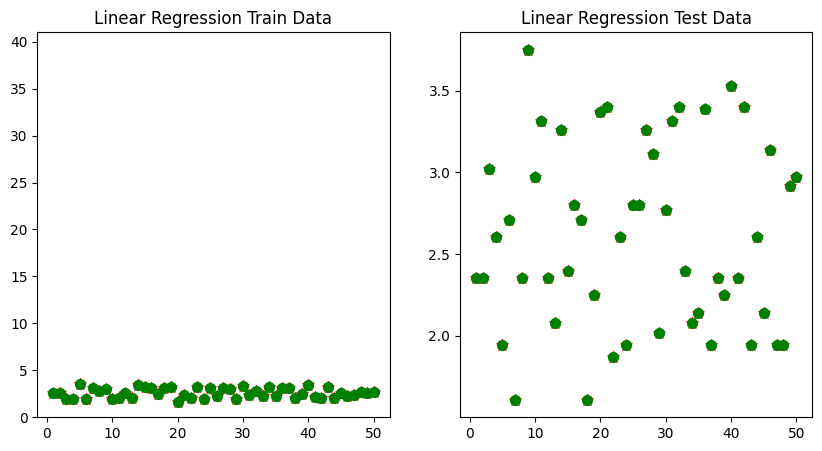

In [174]:
#membuat dua subplot dalam satu figure
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(10,5))

#plot pertama
ax1.scatter(x=range(1,51),y=y_train[:50],marker='*',c='r',s=70,label=['y_test'])
ax1.scatter(x=range(1,51),y=y_train[:50],marker='o',c='g',s=50,label=['y_pred'])
ax1.set_title('Linear Regression Train Data')
ax1.set_ylim([0,41])

#plot kedua
ax2.scatter(x=range(1,51),y=y_test[:50],marker='*',c='r',s=70,label=['y_test'])
ax2.scatter(x=range(1,51),y=y_test[:50],marker='o',c='g',s=50,label=['y_pred'])
ax2.set_title('Linear Regression Test Data')

#menampilkan plot
plt.show()

### 8.2 XG Boost Regressor

In [175]:
xgb_r = xg.XGBRegressor(objective='reg:squarederror',n_estimators = 11, seed = 123)

In [176]:
#XG Boost Regressor
model = xgb_r.fit(X_train, y_train)
y_pred_xgb_train = model.predict(X_train)
y_pred_xgb_test = model.predict(X_test)

# menampilkan nilai R-squared
print('XGB Regressor R squared: ', explained_variance_score(y_test, y_pred_xgb_test))

# menghitung dan menampilkan MRSE
xgb_mse = mean_squared_error(y_test, y_pred_xgb_test)
xgb_rmse = np.sqrt(xgb_mse)
print('RMSE: %.4f' % xgb_rmse)

XGB Regressor R squared:  0.9427203352869514
RMSE: 0.1426


Hasil dari XG Boost Regressor ini memiliki akurasi atau skor 94,27% dan nilai RMSE 0.1426

In [177]:
train=pd.DataFrame(y_train[:10])
train['predict train']=y_pred_xgb_train[:10]
train['difference']=train['price']-train['predict train']
train

,price,predict train,difference
244367,2.602690,2.454074,0.148615
42499,2.602690,2.542409,0.060280
33844,1.945910,1.967945,-0.022034
599991,1.945910,1.924079,0.021831
423800,3.555348,2.907676,0.647673
24680,1.945910,1.760785,0.185126
537041,3.113515,3.003489,0.110026
605986,2.803360,2.804922,-0.001561
396374,2.970414,2.852052,0.118363
216668,1.945910,1.924079,0.021831


In [178]:
test=pd.DataFrame(y_test[:10])
test['predict test']=y_pred_xgb_test[:10]
test['difference']=test['price']-test['predict test']
test

,price,predict test,difference
513942,2.351375,2.262488,0.088887
8341,2.351375,2.225722,0.125653
665488,3.020425,2.978375,0.042049
437870,2.602690,2.586866,0.015823
646676,1.945910,2.000457,-0.054546
182497,2.708050,2.689245,0.018805
226256,1.609438,1.498003,0.111435
65346,2.351375,2.385323,-0.033947
278849,3.749504,3.668299,0.081205
181196,2.970414,2.849459,0.120955


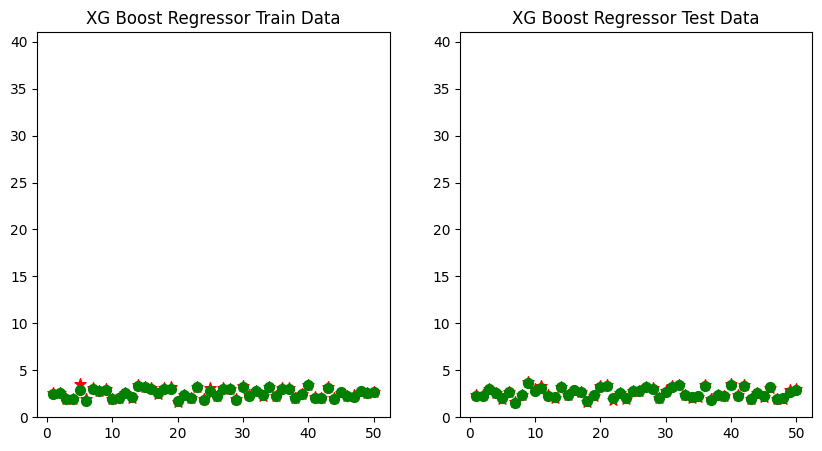

In [179]:
#membuat dua subplot dalam satu figure
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(10,5))

#plot pertama
ax1.scatter(x=range(1,51),y=y_train[:50],marker='*',c='r',s=70,label=['y_test'])
ax1.scatter(x=range(1,51),y=y_pred_xgb_train[:50],marker='o',c='g',s=50,label=['y_pred'])
ax1.set_title('XG Boost Regressor Train Data')
ax1.set_ylim([0,41])

#plot kedua
ax2.scatter(x=range(1,51),y=y_test[:50],marker='*',c='r',s=70,label=['y_test'])
ax2.scatter(x=range(1,51),y=y_pred_xgb_test[:50],marker='o',c='g',s=50,label=['y_pred'])
ax2.set_title('XG Boost Regressor Test Data')
ax2.set_ylim([0,41])
#menampilkan plot
plt.show()

### 8.3 Random Forest Regressor

In [180]:
model_RF = RandomForestRegressor(n_estimators=50)

# Train the Model
model_RF.fit(X_train, y_train)

# Predict the Response
y_predRF = model_RF.predict(X_test)

print('Random Forest test R squared: ', model_LR.score(X_test, y_test))

RF_mse = mean_squared_error(y_predRF, y_test)
RF_rmse = np.sqrt(RF_mse)
print('RMSE: %.4f' % RF_rmse)

Random Forest test R squared:  0.9381193381829673
RMSE: 0.1329


Hasil dari Random Forest Regressor ini memiliki akurasi atau skor 93,81% dan nilai RMSE 0.1329

In [181]:
train=pd.DataFrame(y_train[:10])
train['predict train']=y_train[:10]
train['difference']=train['price']-train['predict train']
train

,price,predict train,difference
244367,2.602690,2.602690,0.0
42499,2.602690,2.602690,0.0
33844,1.945910,1.945910,0.0
599991,1.945910,1.945910,0.0
423800,3.555348,3.555348,0.0
24680,1.945910,1.945910,0.0
537041,3.113515,3.113515,0.0
605986,2.803360,2.803360,0.0
396374,2.970414,2.970414,0.0
216668,1.945910,1.945910,0.0


In [182]:
test=pd.DataFrame(y_test[:10])
test['predict test']=y_test[:10]
test['difference']=test['price']-test['predict test']
test

,price,predict test,difference
513942,2.351375,2.351375,0.0
8341,2.351375,2.351375,0.0
665488,3.020425,3.020425,0.0
437870,2.602690,2.602690,0.0
646676,1.945910,1.945910,0.0
182497,2.708050,2.708050,0.0
226256,1.609438,1.609438,0.0
65346,2.351375,2.351375,0.0
278849,3.749504,3.749504,0.0
181196,2.970414,2.970414,0.0


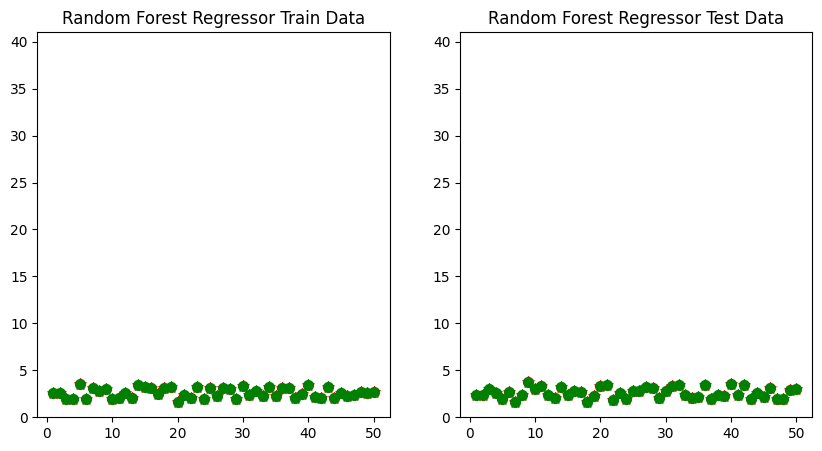

In [183]:
#membuat dua subplot dalam satu figure
fig, (ax1,ax2)=plt.subplots(1,2, figsize=(10,5))

#plot pertama
ax1.scatter(x=range(1,51),y=y_train[:50],marker='*',c='r',s=70,label=['y_test'])
ax1.scatter(x=range(1,51),y=y_train[:50],marker='o',c='g',s=50,label=['y_pred'])
ax1.set_title('Random Forest Regressor Train Data')
ax1.set_ylim([0,41])

#plot kedua
ax2.scatter(x=range(1,51),y=y_test[:50],marker='*',c='r',s=70,label=['y_test'])
ax2.scatter(x=range(1,51),y=y_test[:50],marker='o',c='g',s=50,label=['y_pred'])
ax2.set_title('Random Forest Regressor Test Data')
ax2.set_ylim([0,41])
#menampilkan plot
plt.show()
     

In [184]:
print('test',y_test)
print('train', y_train)

test 513942    2.351375
8341      2.351375
665488    3.020425
437870    2.602690
646676    1.945910
            ...   
262904    3.749504
486041    2.397895
77196     2.014903
395102    2.140066
54141     2.351375
Name: price, Length: 191393, dtype: float64
train 244367    2.602690
42499     2.602690
33844     1.945910
599991    1.945910
423800    3.555348
            ...   
401208    3.481240
193136    2.014903
567049    3.113515
14001     2.602690
571458    2.803360
Name: price, Length: 446583, dtype: float64


In [185]:
print('R^2 score data train model Random Forest adalah :',r2_score(y_train, y_train))
print('R^2 score data test model Random Forest adalah :',r2_score(y_test, y_test))
print('-------------------------------------------------------------------------')
mse_train = mean_squared_error(y_test,y_test)
mse_test = mean_squared_error(y_train,y_train)
rootmeansq_train = np.sqrt(mse_train)
rootmeansq_test = np.sqrt(mse_test)

print('MSE data train model Random Forest :',mse_train)
print('MSE data test model Random Forest :',mse_test)
print('-------------------------------------------------------------------------')
print('RMSE data train model Random Forest :', rootmeansq_train)
print('RMSE data test model Random Forest :', rootmeansq_test)
print('-------------------------------------------------------------------------')


R^2 score data train model Random Forest adalah : 1.0
R^2 score data test model Random Forest adalah : 1.0
-------------------------------------------------------------------------
MSE data train model Random Forest : 0.0
MSE data test model Random Forest : 0.0
-------------------------------------------------------------------------
RMSE data train model Random Forest : 0.0
RMSE data test model Random Forest : 0.0
-------------------------------------------------------------------------


### 8.4 KNeighbors Regressor

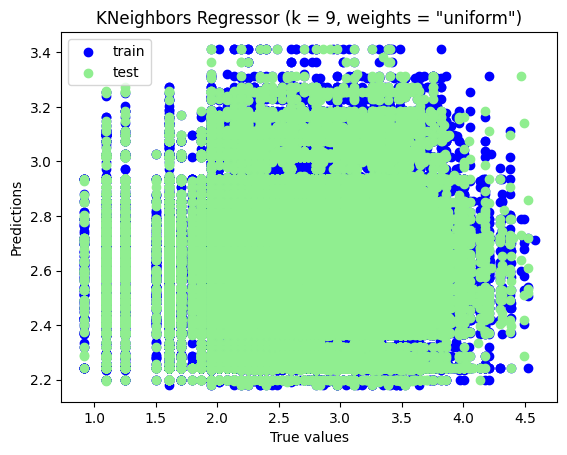

KNeighbors Regressor R squared:  -0.08887771869848926
RMSE: 0.5944


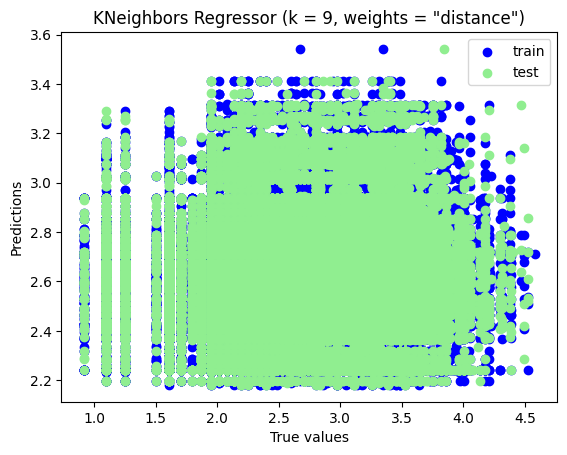

KNeighbors Regressor R squared:  -0.08922307527547702
RMSE: 0.5945


In [186]:
n_neighbors = 9

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    knn.fit(X_train, y_train)
    y_predknn = knn.predict(X_test)

    # plot scatter plot data train dan data test
    plt.scatter(y_train, knn.predict(X_train), c='blue', label='train')
    plt.scatter(y_test, y_predknn, c='lightgreen', label='test')
    plt.legend()
    plt.title('KNeighbors Regressor (k = %d, weights = "%s")' % (n_neighbors, weights))
    plt.xlabel('True values')
    plt.ylabel('Predictions')
    plt.show()
    
    print('KNeighbors Regressor R squared: ', explained_variance_score(y_test, y_predknn))
    KNN_mse = mean_squared_error(y_test, y_predknn)
    KNN_rmse = np.sqrt(KNN_mse)
    print('RMSE: %.4f' % KNN_rmse)


### 8.5 Decision Tree Regressor

In [187]:
dt = DecisionTreeRegressor()

dt_model = dt.fit(X_train, y_train)

y_pred2 = dt_model.predict(X_test)
l_dt_train_r2 = dt.score(X_train,y_train)
l_dt_test_r2 = dt.score(X_test, y_test)
print('Decision Tree test R squared": %.4f' % l_dt_test_r2)

dt_mse = mean_squared_error(y_pred2, y_test)
dt_rmse = np.sqrt(dt_mse)
print('Decision Tree Regressor RMSE: %.4f' % dt_rmse)

Decision Tree test R squared": 0.9142
Decision Tree Regressor RMSE: 0.1664


## **9. Hypothesis**

In [188]:
uber = df[df['cab_type']==1]
lyft = df[df['cab_type']==1]

In [189]:
n_uber = len(uber)
mean_uber = uber['price'].mean()
std_uber = uber['price'].std()
print('Jumlah data Uber:',n_uber,'\nMean Uber:',mean_uber,'\nStd Uber:',std_uber)

Jumlah data Uber: 330568 
Mean Uber: 15.795343166912708 
Std Uber: 8.560299982013996


In [190]:
n_lyft = len(lyft)
mean_lyft = lyft['price'].mean()
std_lyft = lyft['price'].std()
print('Jumlah data Lyft:',n_lyft,'\nMean Lyft:',mean_lyft,'\nStd Lyft:',std_lyft)

Jumlah data Lyft: 330568 
Mean Lyft: 15.795343166912708 
Std Lyft: 8.560299982013996


In [191]:
alpha = 0.05
price_hypo = sm.stats.ztest(uber['price'].dropna(),
                            lyft['price'].dropna(), 
                            alternative='two-sided')
print(price_hypo)

(0.0, 1.0)


In [192]:
if price_hypo[1]>alpha:
    print('Terima Hipotesis nol(H0), Rata-rata harga order taksi Uber sama dengan rata-rata harga order taksi Lyft')
else:
    print('Reject Hipotesis nol(H0), Rata-rata harga order taksi Uber tidak sama dengan rata-rata harga order taksi Lyft')

Terima Hipotesis nol(H0), Rata-rata harga order taksi Uber sama dengan rata-rata harga order taksi Lyft


## **10. Kesimpulan**

Dari analisis yang telah kami lakukan, maka dapat diperoleh kesimpulan sebagai berikut:
1.   Proyek ini memperkenalkan penerapan regresi linear pada dataset Uber & Lyft. Dataset ini terdiri dari 693.071 pengamatan/baris dan 57 fitur/kolom yang menunjukkan harga perjalanan menggunakan taksi Uber & Lyft berdasarkan waktu, penggandaan harga (surge multiplier), jarak, dan kondisi cuaca pada saat itu. Variabel dependen/responnya adalah harga.
2.   Dari dataset tersebut, dapat dilihat bahwa Uber cenderung menawarkan harga yang lebih murah daripada Lyft, membuat Uber menjadi pilihan yang lebih ekonomis. Namun, Lyft juga menawarkan harga yang kompetitif.
3. Banyaknya kolom pada suatu data tidak harus dijadikan sebagai bagian dari linear regresi. Pada percobaan ini, data yang digunakan memiliki 10 atribut/faktor yang mempengaruhi tarif taksi online.
4. Metode yang paling tepat dengan best configuration untuk memprediksi harga transportasi online adalah metode XG Boost Regressorr, karena tingkat akurasinya tertinggi daripada metode lain, yaitu mencapai 94.27% dengan Mean Squared Error yaitu 0.1426.